In [16]:
# 일원분산분석 (One-way ANOVA)
# 출처 : https://partrita.github.io/posts/ANOVA-python/

import numpy as np
import urllib
import matplotlib.pyplot as plt

# url로 데이터 읽어오기
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

x1 = data[data[:,1] == 1,0]
x2 = data[data[:,1] == 2,0]
x3 = data[data[:,1] == 3,0]

data

array([[243.,   1.],
       [251.,   1.],
       [275.,   1.],
       [291.,   1.],
       [347.,   1.],
       [354.,   1.],
       [380.,   1.],
       [392.,   1.],
       [206.,   2.],
       [210.,   2.],
       [226.,   2.],
       [249.,   2.],
       [255.,   2.],
       [273.,   2.],
       [285.,   2.],
       [295.,   2.],
       [309.,   2.],
       [241.,   3.],
       [258.,   3.],
       [270.,   3.],
       [293.,   3.],
       [328.,   3.]])

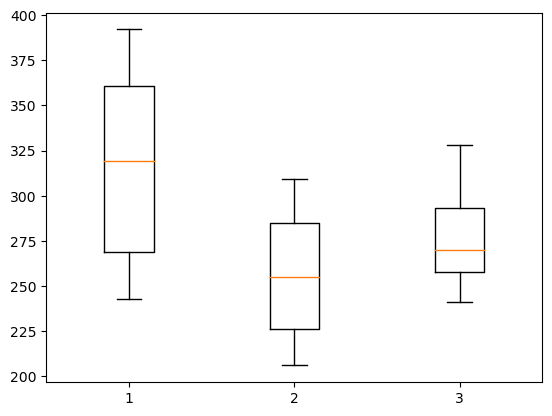

In [17]:
# matplot
plot_data = [x1, x2, x3]

plot_data

plt.boxplot(plot_data)
plt.show()

In [ ]:
# f_oneway() 함수를 이용한 ANOVA 분석은 각 집단별로
# 차이가 있는지 여부만 확인할 수 있을 뿐 어떤 집단과 어떤 집단에
# 차이가 있는지는 확인이 불가능하다. (221130)

In [18]:
from scipy.stats import f_oneway

F_statistic, pVal = f_oneway(x1, x2, x3)

In [19]:
F_statistic

3.7113359882669763

In [20]:
pVal

0.043589334959178244

In [21]:
# p-value < 0.05 이므로 그룹의 각 평균값이 통계적으로 유의미한 차이가 있다.
# H0 : u1 = u2 = u3 --> 귀무가설은 기각된다.
# "적어도 1개는 평균값에 통계적으로 유의미한 차이가 있다."로 해석된다. (221130)

In [ ]:
# statsmodels.formula.api 모듈을 활용
# 연속형 변수인 반응변수(value)와 그룹 변수(treatment)이 요인을 활용한 회귀모형을 생성
# -> 분산분석 표 및 가설검증을 확인하기 위한 함수에 적용

In [30]:
# 회귀모형 생성 : ols().fit() 함수 이용

# from statsmodels.formmula.api import ols
# 객체명 = ols("반응변수 ~ 인자", data = DataFrame 객체).fit()
# 객체명.summary()

# 주의.
# 그룹 변수명이 문자형이 아닌 경우 입력 시 유의사항
# 그룹 변수명이 연속형이거나 이산형인 경우 C()에 변수명을 넣어서 --- 인덱스로 변경하던지
# 그룹 변수가 범주형 자료로 인식하도록 변경시켜주어야 함 (221130)

from statsmodels.formula.api import ols
import pandas as pd

df = pd.DataFrame(data, columns=['value', 'treatment'])
df.head()

,value,treatment
0,243.0,1.0
1,251.0,1.0
2,275.0,1.0
3,291.0,1.0
4,347.0,1.0


In [31]:
formula = 'value~C(treatment)' # 그룹 변수명이 연속형이거나 이산형인 경우, C()에 변수명을 넣어야 한다.
model = ols(formula, df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     3.711
Date:                Wed, 30 Nov 2022   Prob (F-statistic):             0.0436
Time:                        11:50:43   Log-Likelihood:                -113.70
No. Observations:                  22   AIC:                             233.4
Df Residuals:                      19   BIC:                             236.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             316.6250    

In [33]:
# 분산 분석표

from statsmodels.stats.anova import anova_lm

print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN


In [34]:
# 사후분석 (Post Hoc Analysis)

# p-value를 통해 통계적으로 유의한 차가 있다는 것을 확인했으나,
# 구체적으로 어떤 집단간 차이가 있는지 확인할 수 없다. -> 사후 검정의 필요성

from statsmodels.stats.multicomp import pairwise_tukeyhsd

post_hoc = pairwise_tukeyhsd(df['value'], df['treatment'], alpha=0.05)  # alpha 유의수준

print(post_hoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
   1.0    2.0 -60.1806 0.0355  -116.619 -3.7421   True
   1.0    3.0  -38.625 0.3215 -104.8404 27.5904  False
   2.0    3.0  21.5556 0.6802  -43.2295 86.3406  False
------------------------------------------------------


Figure(1000x600)


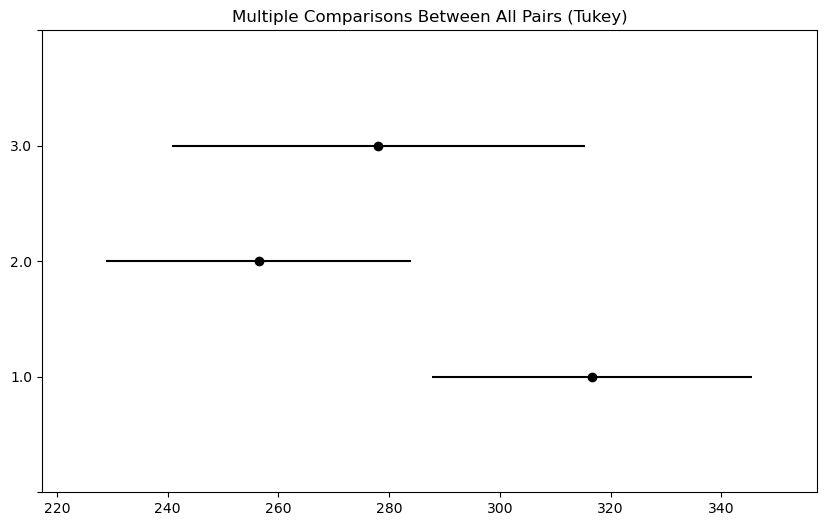

In [35]:
# 반응변수 : value / 인자 : treatment
# 그룹 1(x1)과 그룹 2(x2)에서만 통계적인 유의미성(p-value < 0.05)을 가질 수 있는 것을 확인 (221130)

print(post_hoc.plot_simultaneous())  # 사후 분석 결과를 그림으로 출력

In [ ]:
# 1-2 그룹은 겹치는 부분이 없으나,
# 2-3 그룹은 대부분이 겹치고, 1-3은 절만 정도가 겹치는 것을 그래프로 확인할 수 있다.

# 분산분석(ANOVA)를 통해 3가지 그룹간에 통계적인 차이가 있다는 것을 증명했고,
# 사후검정을 통해 그룹 1과 2의 "평균"이 유의미한 차이가 있다는 것을 확인했다.


# Q : plot_simultaneous() 나타내는 결과의 의미는? boxplot으로 나타내는 것과 차이점?